## Import and load

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('animal-data-1.csv')

In [3]:
df.head()

,id,intakedate,intakereason,istransfer,sheltercode,identichipnumber,animalname,breedname,basecolour,speciesname,...,movementdate,movementtype,istrial,returndate,returnedreason,deceaseddate,deceasedreason,diedoffshelter,puttosleep,isdoa
0,15801,2009-11-28 00:00:00,Moving,0,C09115463,0A115D7358,Jadzia,Domestic Short Hair,Tortie,Cat,...,2017-05-13 00:00:00,Adoption,0.0,NaN,Stray,NaN,Died in care,0,0,0
1,15932,2009-12-08 00:00:00,Moving,0,D09125594,0A11675477,Gonzo,German Shepherd Dog/Mix,Tan,Dog,...,2017-04-24 00:00:00,Adoption,0.0,NaN,Stray,NaN,Died in care,0,0,0
2,28859,2012-08-10 00:00:00,Abandoned,0,D12082309,0A13253C7B,Maggie,Shep Mix/Siberian Husky,Various,Dog,...,2017-04-15 00:00:00,Adoption,0.0,NaN,Stray,NaN,Died in care,0,0,0
3,30812,2013-01-11 00:00:00,Abandoned,0,C1301091,0A13403D4D,Pretty Girl,Domestic Short Hair,Dilute tortoiseshell,Cat,...,2017-04-18 00:00:00,Foster,0.0,2018-05-29 00:00:00,Stray,NaN,Died in care,0,0,0
4,30812,2013-01-11 00:00:00,Abandoned,0,C1301091,0A13403D4D,Pretty Girl,Domestic Short Hair,Dilute tortoiseshell,Cat,...,2018-05-29 00:00:00,Adoption,0.0,NaN,Stray,NaN,Died in care,0,0,0


Note: Rows 3 and 4 are the same cat; she was first taken to the shelter on 1/2013, and then removed from the shelter on 4/2017 to a foster home. She was returned to the same shelter on 5/2018 and was adopted on the same day.
<br>
Perhaps we keep the id column for now

In [4]:
df.columns

Index(['id', 'intakedate', 'intakereason', 'istransfer', 'sheltercode',
       'identichipnumber', 'animalname', 'breedname', 'basecolour',
       'speciesname', 'animalage', 'sexname', 'location', 'movementdate',
       'movementtype', 'istrial', 'returndate', 'returnedreason',
       'deceaseddate', 'deceasedreason', 'diedoffshelter', 'puttosleep',
       'isdoa'],
      dtype='object')

In [5]:
# change some column names

df.columns = ['id', 'intakedate', 'intakereason', 'istransfer', 'sheltercode',
       'chipnum', 'name', 'breed', 'basecolor',
       'species', 'age', 'sex', 'location', 'movementdate',
       'movementtype', 'istrial', 'returndate', 'returnedreason',
       'deceaseddate', 'deceasedreason', 'diedoffshelter', 'puttosleep',
       'isdoa']

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10290 entries, 0 to 10289
Data columns (total 23 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              10290 non-null  int64  
 1   intakedate      10290 non-null  object 
 2   intakereason    10288 non-null  object 
 3   istransfer      10290 non-null  int64  
 4   sheltercode     10290 non-null  object 
 5   chipnum         8324 non-null   object 
 6   name            10290 non-null  object 
 7   breed           10245 non-null  object 
 8   basecolor       10290 non-null  object 
 9   species         10290 non-null  object 
 10  age             10290 non-null  object 
 11  sex             10290 non-null  object 
 12  location        10290 non-null  object 
 13  movementdate    10290 non-null  object 
 14  movementtype    10290 non-null  object 
 15  istrial         10289 non-null  float64
 16  returndate      3256 non-null   object 
 17  returnedreason  10290 non-null 

## Convert to datetime

In [7]:
# convert these to datetype
datetime = ['intakedate', 'movementdate','returndate', 'deceaseddate']

for date in datetime:
    df[date]= pd.to_datetime(df[date])
    
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10290 entries, 0 to 10289
Data columns (total 23 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   id              10290 non-null  int64         
 1   intakedate      10290 non-null  datetime64[ns]
 2   intakereason    10288 non-null  object        
 3   istransfer      10290 non-null  int64         
 4   sheltercode     10290 non-null  object        
 5   chipnum         8324 non-null   object        
 6   name            10290 non-null  object        
 7   breed           10245 non-null  object        
 8   basecolor       10290 non-null  object        
 9   species         10290 non-null  object        
 10  age             10290 non-null  object        
 11  sex             10290 non-null  object        
 12  location        10290 non-null  object        
 13  movementdate    10290 non-null  datetime64[ns]
 14  movementtype    10290 non-null  object        
 15  is

## Deal with missing values

id                   0
intakedate           0
intakereason         2
istransfer           0
sheltercode          0
chipnum           1966
name                 0
breed               45
basecolor            0
species              0
age                  0
sex                  0
location             0
movementdate         0
movementtype         0
istrial              1
returndate        7034
returnedreason       0
deceaseddate      9964
deceasedreason       0
diedoffshelter       0
puttosleep           0
isdoa                0
dtype: int64

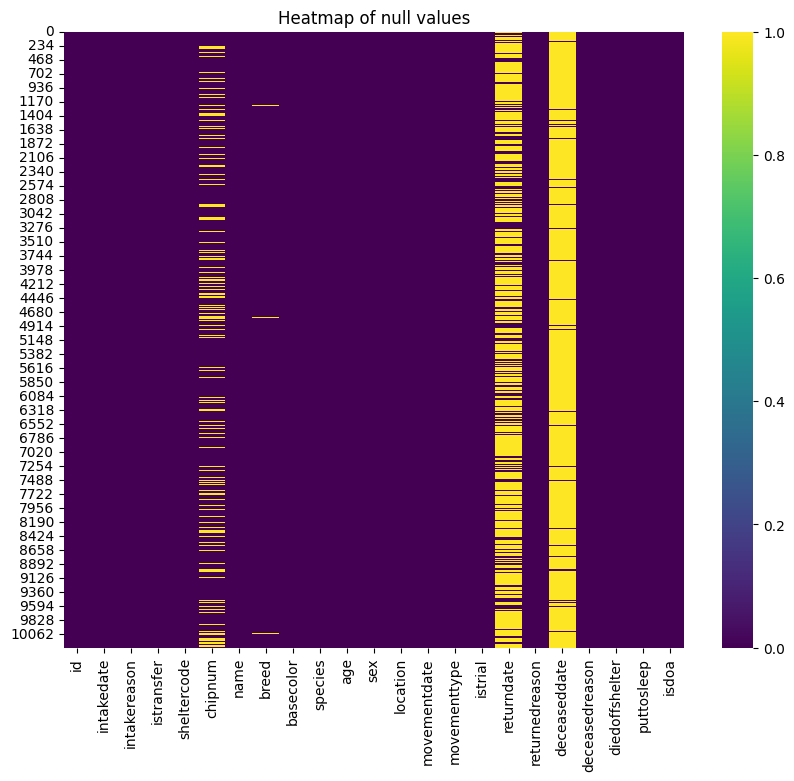

In [8]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.isnull(), cmap='viridis')
plt.title('Heatmap of null values')
df.isnull().sum()

## Convert age to float

In [9]:
df.age.sample(10)

# convert age to float...

# modified from stackexchange
# function to get age_float
def convert_age(y_float, m_float, w_float):
   return round(y_float + m_float/12 + w_float/52, 2)


In [10]:
# scratch
import re  
# create years column
df['age_years'] = df['age'].apply(lambda x: x[:2] if re.search('year.*', x) else 0).astype('float')


# weeks column
df['age_weeks'] = df['age'].apply(lambda x: x[-9:-6] if re.search('week.*', x) else 0).astype('float')


# months column (hardest) 
df['age_months'] = df['age'].apply(lambda x: x[-10:-7]\
                                   if re.search('months.$', x)\
                                   else x[-9:-6] if re.search('month.$', x)\
                                    else 0).astype('float')

# still need to check if the following formats exist:
# y years m months w weeks, or m months w weeks
# if so, need to modify df.age_months to include those cases

# sanity check
df[['age', 'age_years', 'age_months', 'age_weeks']].sample(10)

,age,age_years,age_months,age_weeks
1833,6 years 4 months.,6.0,4.0,0.0
2713,3 years 2 months.,3.0,2.0,0.0
9878,13 weeks.,0.0,0.0,13.0
9345,11 weeks.,0.0,0.0,11.0
958,16 years 10 months.,16.0,10.0,0.0
8753,5 years 0 months.,5.0,0.0,0.0
6542,25 weeks.,0.0,0.0,25.0
4917,7 months.,0.0,7.0,0.0
4583,4 years 11 months.,4.0,11.0,0.0
1358,2 years 5 months.,2.0,5.0,0.0


In [11]:
week_olds = df[df.age.str.endswith('weeks.')]
month_olds = df[df.age.str.endswith('months.')]
#year_olds = df[df.age.str.endswith('years.')]

week_olds[['age', 'age_years', 'age_months', 'age_weeks']].sample(20)
month_olds[['age', 'age_years','age_months', 'age_weeks']].sample(20)
#year_olds[['age', 'age_years', 'age_months', 'age_weeks']] # empty; can ignore

# verified that the age formats are either y years m months, or m months, or w weeks
# NEVER y years m months w weeks, or m months w weeks

,age,age_years,age_months,age_weeks
6627,1 year 9 months.,1.0,9.0,0.0
9329,1 year 2 months.,1.0,2.0,0.0
5977,8 months.,0.0,8.0,0.0
1427,1 year 6 months.,1.0,6.0,0.0
7581,2 years 0 months.,2.0,0.0,0.0
4144,3 years 8 months.,3.0,8.0,0.0
4460,2 years 10 months.,2.0,10.0,0.0
3365,16 years 11 months.,16.0,11.0,0.0
5594,6 months.,0.0,6.0,0.0
5350,11 months.,0.0,11.0,0.0


In [12]:
# create age_float, and then drop the existing age columns
df['age_float'] = convert_age(df.age_years, df.age_months, df.age_weeks)

In [13]:
# sanity check for df.age_float
df[['age', 'age_years', 'age_months', 'age_weeks', 'age_float']].sample(10)

,age,age_years,age_months,age_weeks,age_float
5347,2 years 1 month.,2.0,1.0,0.0,2.08
6212,18 weeks.,0.0,0.0,18.0,0.35
7680,1 year 5 months.,1.0,5.0,0.0,1.42
544,1 year 7 months.,1.0,7.0,0.0,1.58
1316,4 years 10 months.,4.0,10.0,0.0,4.83
6382,16 weeks.,0.0,0.0,16.0,0.31
3430,1 year 1 month.,1.0,1.0,0.0,1.08
3359,11 years 0 months.,11.0,0.0,0.0,11.00
5192,1 year 5 months.,1.0,5.0,0.0,1.42
1744,3 years 4 months.,3.0,4.0,0.0,3.33


In [14]:
to_drop = ['age', 'age_years', 'age_months', 'age_weeks', 'sheltercode']
df=df.drop(to_drop, axis=1)

df.columns

Index(['id', 'intakedate', 'intakereason', 'istransfer', 'chipnum', 'name',
       'breed', 'basecolor', 'species', 'sex', 'location', 'movementdate',
       'movementtype', 'istrial', 'returndate', 'returnedreason',
       'deceaseddate', 'deceasedreason', 'diedoffshelter', 'puttosleep',
       'isdoa', 'age_float'],
      dtype='object')

## Back to missing values...

In [15]:
# dealing with null values
df['is_chipped'] = df['chipnum'].notnull().apply(lambda x: 0 if x==False else 1)

df[['chipnum', 'is_chipped']].sample(10)

,chipnum,is_chipped
5317,981020017482905,1
9626,981020031383700,1
2445,981020023392423,1
442,981020021800945,1
2946,981020023536499,1
5962,981020027287270,1
3121,NaN,0
8468,NaN,0
3509,981020023166094,1
3554,0A113C7E54,1


In [16]:
df=df.drop('chipnum', axis=1)

# breed
df.breed.fillna('unknown', inplace=True)
df.breed.isnull().sum()

0

In [17]:
# returndate, deceaseddate

returned = df[df.returndate.notnull()]\
[['id', 'species', 'sex', 'intakedate', 'returnedreason', 'deceaseddate', 'age_float', 'is_chipped']]


# Tennessee the dog
df[(df.index == 9) | (df.index==10) | (df.index==11)].T

,9,10,11
id,46238,46238,46238
intakedate,2016-10-09 00:00:00,2016-10-09 00:00:00,2016-10-09 00:00:00
intakereason,Abandoned,Abandoned,Abandoned
istransfer,0,0,0
name,Tennessee,Tennessee,Tennessee
breed,Heeler/Mix,Heeler/Mix,Heeler/Mix
basecolor,Brown and Black,Brown and Black,Brown and Black
species,Dog,Dog,Dog
sex,Male,Male,Male
location,Special Care Dogs,Special Care Dogs,Special Care Dogs


In [18]:
#sort by id
df.sort_values('id').head(10)

,id,intakedate,intakereason,istransfer,name,breed,basecolor,species,sex,location,...,istrial,returndate,returnedreason,deceaseddate,deceasedreason,diedoffshelter,puttosleep,isdoa,age_float,is_chipped
0,15801,2009-11-28,Moving,0,Jadzia,Domestic Short Hair,Tortie,Cat,Female,Adoptable Cat Glass Colony,...,0.0,NaT,Stray,NaT,Died in care,0,0,0,9.17,1
1,15932,2009-12-08,Moving,0,Gonzo,German Shepherd Dog/Mix,Tan,Dog,Male,Adoptable Dogs,...,0.0,NaT,Stray,NaT,Died in care,0,0,0,9.08,1
2,28859,2012-08-10,Abandoned,0,Maggie,Shep Mix/Siberian Husky,Various,Dog,Female,Adoptable Dogs,...,0.0,NaT,Stray,NaT,Died in care,0,0,0,6.67,1
3,30812,2013-01-11,Abandoned,0,Pretty Girl,Domestic Short Hair,Dilute tortoiseshell,Cat,Female,Stray Cats,...,0.0,2018-05-29,Stray,NaT,Died in care,0,0,0,8.92,1
4,30812,2013-01-11,Abandoned,0,Pretty Girl,Domestic Short Hair,Dilute tortoiseshell,Cat,Female,Stray Cats,...,0.0,NaT,Stray,NaT,Died in care,0,0,0,8.92,1
5,31469,2013-03-26,Incompatible with owner lifestyle,0,Bonnie,Basenji/Mix,Brown and White,Dog,Female,Stray Dogs Beta,...,0.0,2017-05-08,Incompatible with owner lifestyle,NaT,Died in care,0,0,0,5.92,1
6,31469,2013-03-26,Incompatible with owner lifestyle,0,Bonnie,Basenji/Mix,Brown and White,Dog,Female,Stray Dogs Beta,...,0.0,NaT,Stray,NaT,Died in care,0,0,0,5.92,1
7,40705,2015-06-19,Abandoned,0,Candy,American Sable/American,Brown,House Rabbit,Female,Lobby,...,0.0,NaT,Stray,NaT,Died in care,0,0,0,4.50,0
8,40706,2015-06-19,Abandoned,0,Charlotte,American Sable/American,Brown,House Rabbit,Female,Lobby,...,0.0,NaT,Stray,NaT,Died in care,0,0,0,4.50,0
9,46238,2016-10-09,Abandoned,0,Tennessee,Heeler/Mix,Brown and Black,Dog,Male,Special Care Dogs,...,0.0,2017-07-23,Stray,NaT,Died in care,0,0,0,3.17,1


In [19]:
print('Number of rows: ')
print(len(df))

print(('Number of unique ids: '))
print(df.id.nunique())


print('Percent of unique ids:')
print(round(df.id.nunique()/len(df) * 100,2))

Number of rows: 
10290
Number of unique ids: 
7288
Percent of unique ids:
70.83


Leave returneddate and deceaseddate columns alone for now... 
<br>
Null values in those columns mean the animal hasn't been returned, or the animal has not been reported dead

## Drop location column

In [20]:
df.location.unique()

array(['Adoptable Cat Glass Colony', 'Adoptable Dogs', 'Stray Cats',
       'Stray Dogs Beta', 'Lobby', 'Special Care Dogs', 'Foster',
       'Adoptable Cat Big Colony', 'Stray Dogs Theta', 'Office',
       'Adoptable Cat Small Colony', 'Adoptable Cat Kennels',
       'Feline Nursery', 'Cat room B', 'Dog room C', 'Dog room D',
       'Stray Dogs Alpha', 'Adoptable Cat Middle Colony', 'Dog room B',
       'Veterinary office', 'Check-in', 'Special Care Cats', 'Shelter',
       'Clinic room', 'Canine intake room', 'Dog room A', 'Cat room C',
       'Adoptable window colony', 'Feline intake room', 'Cat room A',
       'Dog room Isolation', 'Petsmart', 'Small Animal room', 'Cat obs',
       'Cat Iso', 'Food prep room',
       'Stray side Men`s restroom-Use for small animal holding-non-adoptable',
       'Incinerator', 'MCHA-offices shelter cat'], dtype=object)

In [21]:
df.drop('location', axis=1, inplace=True)

## Analyze binary columns

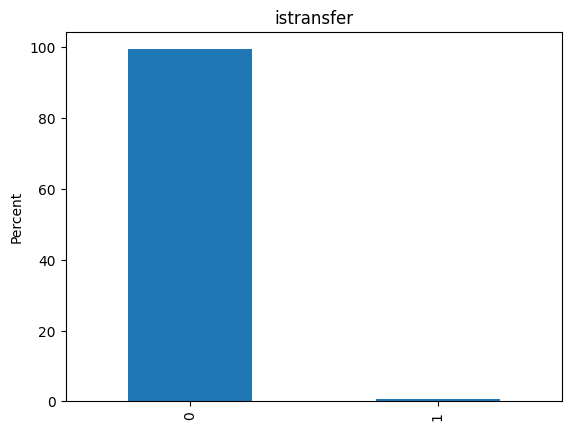

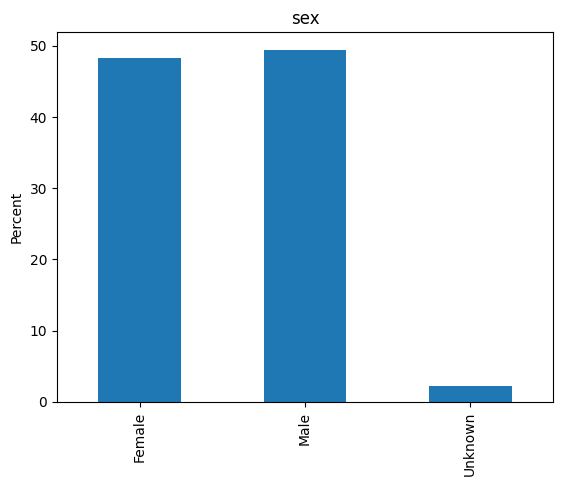

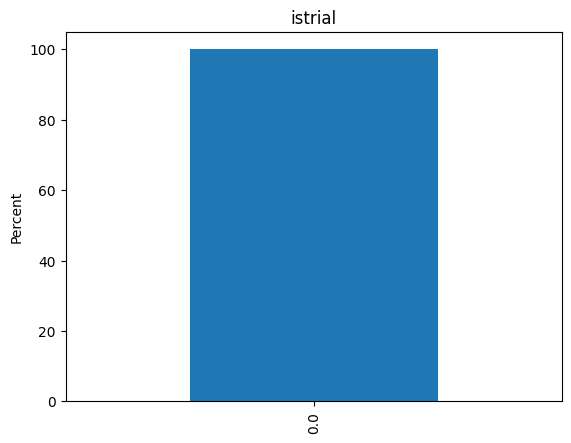

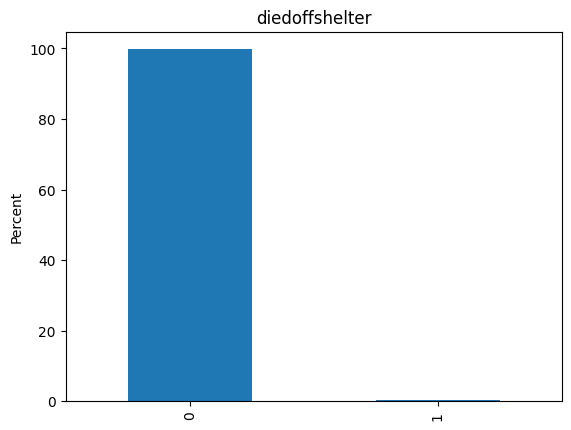

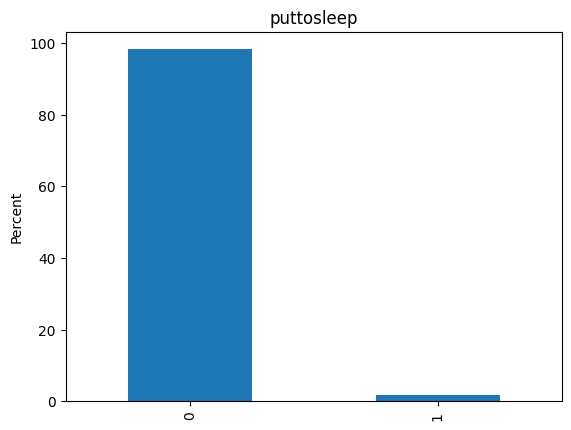

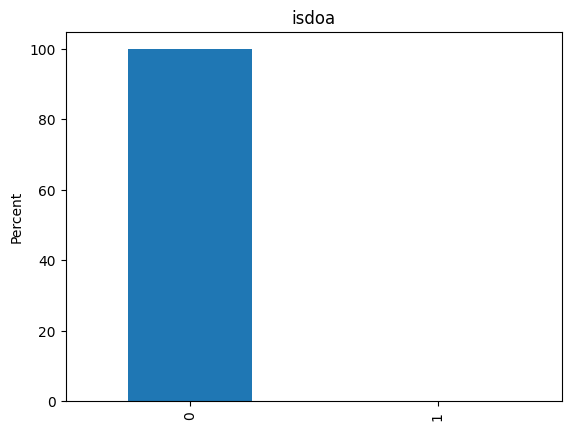

In [22]:
binaries = ['istransfer', 'sex', 'istrial', 'diedoffshelter', 'puttosleep', 'isdoa']

for col in binaries:
    ax = (df[col].value_counts(normalize=True, sort=False)*100).plot.bar()
    ax.set(title=col)
    ax.set(ylabel='Percent')
    plt.show()

From the barchart above, we see that almost all animals are not transfers, trial adoptions, or dead in shelter care. There seems to be roughly equal amount of males and females. We observe these even further...


### Transferred animals

In [23]:
# barely any of the pets are transfers... is there a pattern here?
transferred = df[df.istransfer==1]
print('Total transferred: ', len(transferred))

Total transferred:  61


In [24]:
# transferred

cols_subset = ['id', 'intakereason', 'species', 'sex',
       'movementtype', 'returndate', 'returnedreason',
       'deceaseddate', 'deceasedreason', 'diedoffshelter', 'puttosleep',
       'isdoa', 'age_float']

transferred[cols_subset]


,id,intakereason,species,sex,movementtype,returndate,returnedreason,deceaseddate,deceasedreason,diedoffshelter,puttosleep,isdoa,age_float
554,55593,Transfer from Other Shelter,Dog,Male,Adoption,NaT,Stray,NaT,Died in care,0,0,0,2.50
555,55594,Transfer from Other Shelter,Dog,Female,Adoption,NaT,Stray,NaT,Died in care,0,0,0,2.00
556,55595,Transfer from Other Shelter,Dog,Male,Adoption,NaT,Stray,NaT,Died in care,0,0,0,3.58
557,55596,Transfer from Other Shelter,Dog,Male,Adoption,NaT,Stray,NaT,Died in care,0,0,0,5.67
558,55597,Transfer from Other Shelter,Dog,Female,Adoption,NaT,Stray,NaT,Died in care,0,0,0,2.58
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2949,57766,Transfer from Other Shelter,Dog,Male,Adoption,NaT,Stray,NaT,Court Order/ Legal,0,0,0,1.17
2950,57767,Transfer from Other Shelter,Dog,Female,Adoption,NaT,Stray,NaT,Court Order/ Legal,0,0,0,3.08
2951,57768,Transfer from Other Shelter,Dog,Male,Adoption,NaT,Stray,NaT,Court Order/ Legal,0,0,0,6.08
2955,57771,Transfer from Other Shelter,Dog,Male,Adoption,NaT,Stray,NaT,Court Order/ Legal,0,0,0,2.17


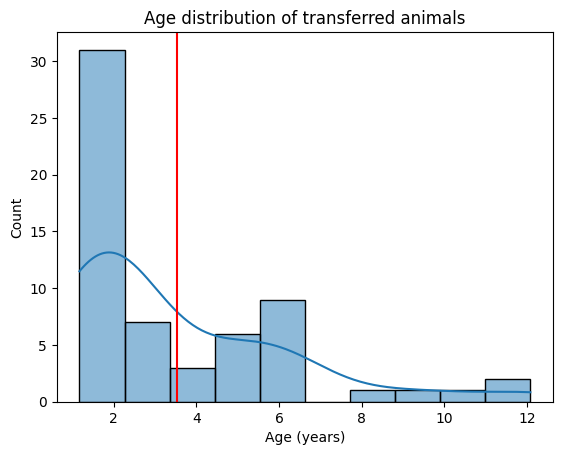

In [25]:
sns.histplot(data=transferred, x='age_float', bins=10, kde=True)
plt.title('Age distribution of transferred animals')
plt.xlabel('Age (years)')

plt.axvline(np.mean(transferred.age_float), 0,30, color='red')

In [26]:
# attempted function for bar plots that failed

bar_cols = ['species', 'sex', 'intakereason']

def make_bar(data=df, cols = bar_cols, angle = 0, title=None):
    for col in cols: #not looking at intakereason for now
        sns.countplot(data=data, x=col, palette='Paired')
        plt.xticks(rotation = angle)
        plt.title(title)
        plt.show()


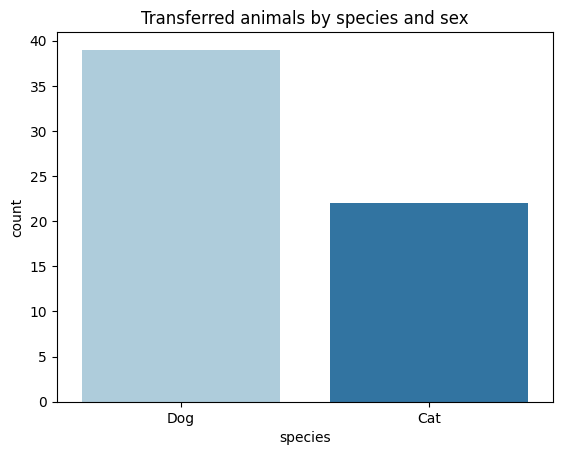

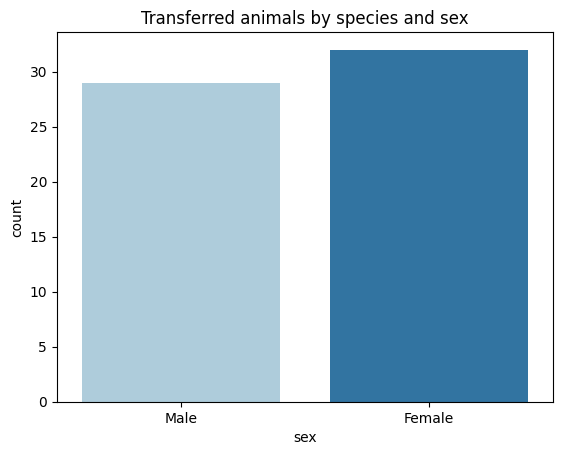

In [27]:
make_bar(data=transferred, cols = bar_cols[0:2], title='Transferred animals by species and sex')

### istrial

In [28]:
print('Number of trials:')
print(len(df[df.istrial==1]))
# no trial foster/adoptions

Number of trials:
0


### diedoffshelter

In [29]:
died = df[df.diedoffshelter==1]
print('Number of animals who died off shelter:')
print(len(died))

Number of animals who died off shelter:
27


In [30]:
died.head(10)

,id,intakedate,intakereason,istransfer,name,breed,basecolor,species,sex,movementdate,...,istrial,returndate,returnedreason,deceaseddate,deceasedreason,diedoffshelter,puttosleep,isdoa,age_float,is_chipped
164,47742,2017-03-25 00:00:00,Abandoned,0,Snickers,Mastiff/Mix,Tan,Dog,Male,2017-04-17,...,0.0,NaT,Stray,2017-04-29,"UU - untreatable, unmanageable",1,0,0,2.58,1
1134,56134,2017-06-09 18:44:13,Incompatible with owner lifestyle,0,Lilly,Pit Bull Terrier,White,Dog,Female,2017-07-08,...,0.0,NaT,Stray,2017-11-27,Died in care,1,0,0,1.83,1
2616,57450,2017-09-16 13:21:43,Stray,0,Kaylee,Domestic Short Hair,Grey and White,Cat,Female,2017-10-17,...,0.0,NaT,Stray,2017-12-29,Medical,1,0,0,0.50,1
2865,57679,2017-10-10 14:53:36,Stray,0,Handsome Bakon,Border Collie/Mix,Black and Tan,Dog,Male,2017-10-10,...,0.0,NaT,Stray,2017-12-18,Dead On Arrival,1,0,1,14.17,1
3908,58691,2018-02-07 17:09:21,Incompatible with owner lifestyle,0,Lucy,Pitbull/Whippet,Tricolour,Dog,Female,2018-03-28,...,0.0,2018-05-19,Transfer from Other Shelter,2019-02-12,Dead On Arrival,1,0,0,2.17,1
3909,58691,2018-02-07 17:09:21,Incompatible with owner lifestyle,0,Lucy,Pitbull/Whippet,Tricolour,Dog,Female,2018-06-05,...,0.0,2018-08-28,Police Assist,2019-02-12,Dead On Arrival,1,0,0,2.17,1
3910,58691,2018-02-07 17:09:21,Incompatible with owner lifestyle,0,Lucy,Pitbull/Whippet,Tricolour,Dog,Female,2018-09-04,...,0.0,2018-11-07,Stray,2019-02-12,Dead On Arrival,1,0,0,2.17,1
3911,58691,2018-02-07 17:09:21,Incompatible with owner lifestyle,0,Lucy,Pitbull/Whippet,Tricolour,Dog,Female,2018-12-22,...,0.0,NaT,Stray,2019-02-12,Dead On Arrival,1,0,0,2.17,1
4799,59512,2018-05-16 12:44:54,Stray,0,Nomi,Domestic Short Hair,Black and grey,Cat,Female,2018-05-22,...,0.0,2018-06-19,Stray,2018-07-17,Vet advised euthanasia,1,0,0,0.27,1
4800,59512,2018-05-16 12:44:54,Stray,0,Nomi,Domestic Short Hair,Black and grey,Cat,Female,2018-06-21,...,0.0,NaT,Stray,2018-07-17,Vet advised euthanasia,1,0,0,0.27,1


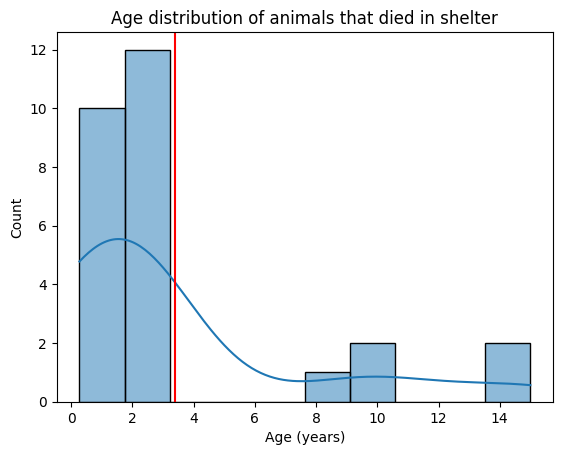

In [31]:
sns.histplot(data=died, x='age_float', bins=10, kde=True)
plt.title('Age distribution of animals that died in shelter')
plt.xlabel('Age (years)')

plt.axvline(np.mean(died.age_float), 0,30, color='red')

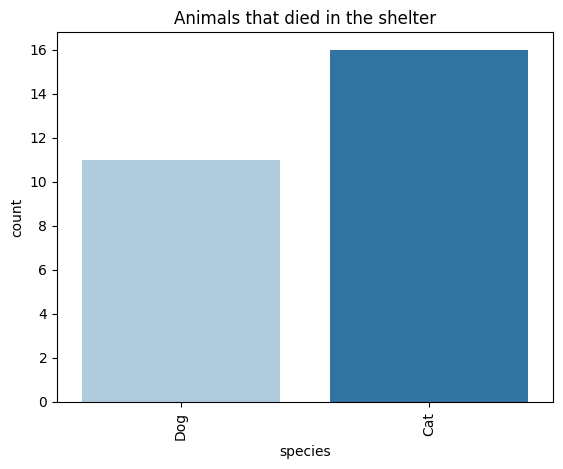

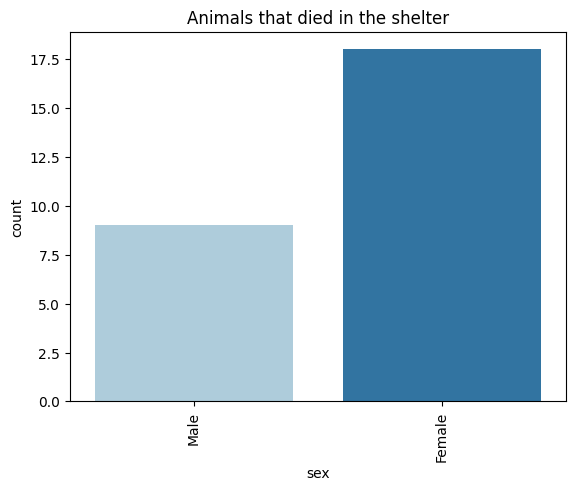

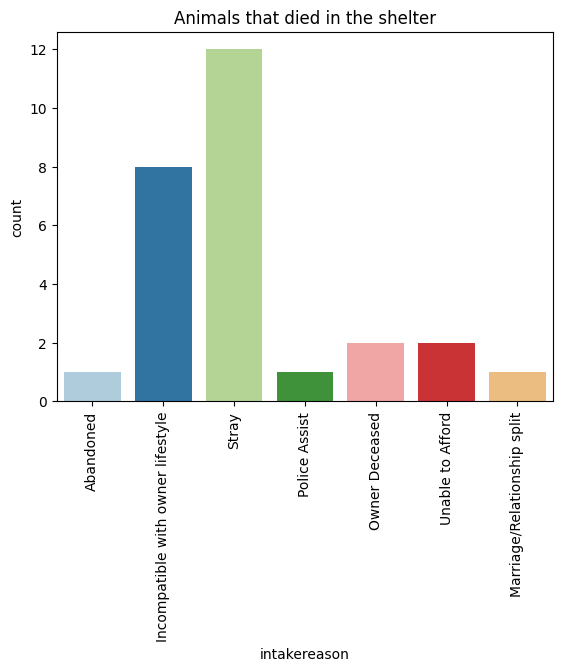

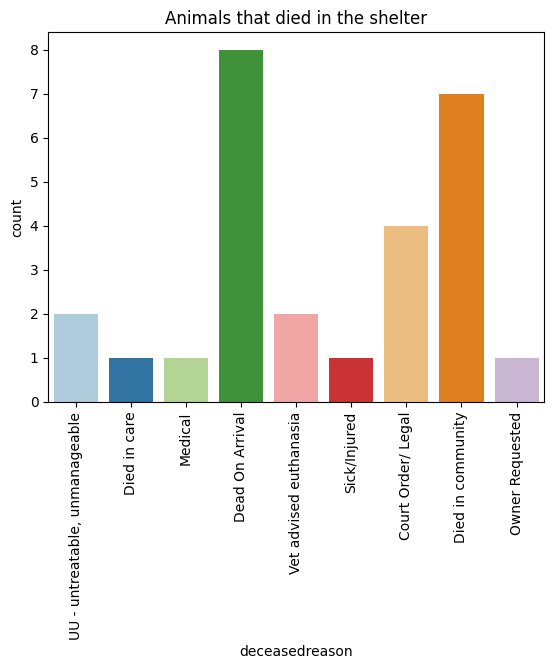

In [32]:
make_bar(data=died, cols=['species', 'sex', 'intakereason','deceasedreason'], angle=90, title='Animals that died in the shelter')

27 (or slightly less) animals died while in shelter care; majority were young, cats and female. Most common cause of death are Dead on arrival and died in community.

In [33]:
# drop rows with unknown sex
df = df[df.sex != 'Unknown']

In [34]:
df.species.value_counts()
# majority are cats or dogs; group the rest as 'other'

Cat             5617
Dog             3881
House Rabbit     216
Rat              115
Guinea Pig        93
Bird              18
Hamster           15
Mouse             13
Livestock         13
Hedgehog          13
Pig               11
Gerbil            10
Chicken            9
Ferret             9
Lizard             6
Goat               5
Sugar Glider       4
Snake              3
Chinchilla         2
Wildlife           1
Name: species, dtype: int64

## Focus on Cats and Dogs

In [35]:
# majority of these are dogs and cats.

#other = ['House Rabbit', 'Rat', 'Guinea Pig', 'Bird', 'Livestock', 'Hamster', 'Hedgehog', 'Mouse', 'Gerbil', 'Pig', 'Ferret', 'Chicken', 'Snake', 'Lizard', \
#        'Wildlife', 'Opossum', 'Fish', 'Goat', 'Sugar Glider', 'Turtle', 'Tortoise', 'Chinchilla', 'Squirrel', \
#        'Tarantula', 'Raccoon']

#df.species.replace(to_replace=other, value="other", inplace=True)

# we will just focus on cats and dogs, and drop the others

df = df[(df.species == 'Cat') | (df.species == 'Dog')]
df.species.value_counts()


Cat    5617
Dog    3881
Name: species, dtype: int64

Text(0.5, 1.0, 'Count of each species at the shelter')

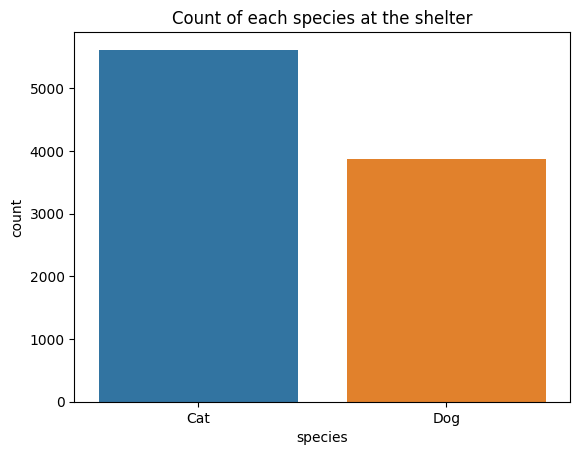

In [36]:
species_order = df.groupby('species').size().sort_values().index[::-1]
sns.countplot(data=df, x='species', order=species_order)
plt.title('Count of each species at the shelter')

Text(0.5, 1.0, 'Count of each species by sex')

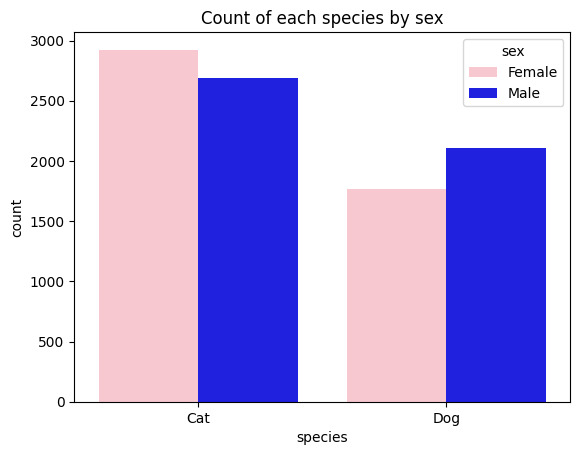

In [37]:
species_order = df.groupby('species').size().sort_values().index[::-1]
sns.countplot(data=df, x='species', order=species_order, hue='sex', palette=['pink', 'blue'])
plt.title('Count of each species by sex')

In [38]:
df.intakereason.value_counts()

Stray                                4663
Incompatible with owner lifestyle    1142
Litter relinquishment                 989
Moving                                402
Unsuitable Accommodation              359
Unable to Afford                      322
Abandoned                             321
Transfer from Other Shelter           217
Police Assist                         197
Born in Shelter                       159
Landlord issues                       143
Owner Deceased                        124
Sick/Injured                          102
Allergies                              80
Incompatible with other pets           59
Biting                                 48
Marriage/Relationship split            38
Rabies Monitoring                      37
TNR - Trap/Neuter/Release              33
Owner Died                             26
Abuse/ neglect                         18
Behavioral Issues                       9
Owner requested Euthanasia              8
DOA                               

In [39]:
# too many values

incompatability = ['Incompatible with owner lifestyle', 'Unsuitable Accommodation', 'Moving', 'Landlord Issues', \
                  'Incompatible with other pets', 'Biting', 'Behavioral Issues', 'Litter relinquishment']

stray = ['Stray', 'Abandoned', 'TNR - Trap/Neuter/Release', 'Owner Died', 'Owner Deceased']

health = ['Allergies', 'Sick/Injured', 'Rabies Monitoring', 'Owner requested Euthanasia', 'DOA']

etc = list(set(df.intakereason.unique()).difference(set(incompatability) | set(stray) | set(health)))

df.intakereason.replace(incompatability, 'Incompatability', inplace=True)
df.intakereason.replace(stray, 'Stray', inplace=True)
df.intakereason.replace(health, 'Health', inplace=True)
df.intakereason.replace(etc, 'other', inplace=True)

df.intakereason.value_counts()

Stray              5167
Incompatability    3008
other              1095
Health              228
Name: intakereason, dtype: int64

Text(0.5, 1.0, 'Intake reason by species')

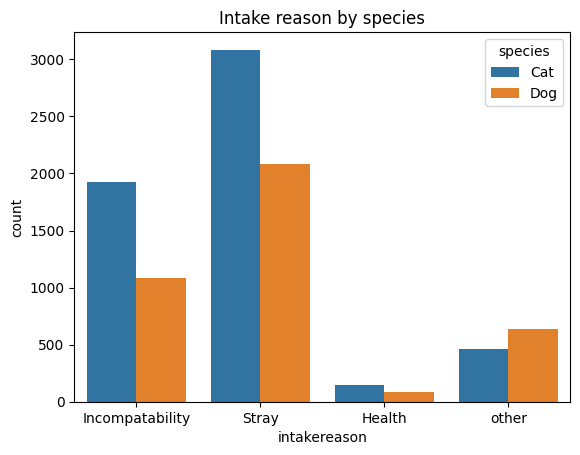

In [40]:
sns.countplot(data=df, x='intakereason', hue='species')
plt.title('Intake reason by species')

In [41]:
print('About ' + str(round(df.is_chipped.sum() / len(df) * 100,2)) + '% of pets have microchips.')

About 87.44% of pets have microchips.


In [42]:
df.columns

Index(['id', 'intakedate', 'intakereason', 'istransfer', 'name', 'breed',
       'basecolor', 'species', 'sex', 'movementdate', 'movementtype',
       'istrial', 'returndate', 'returnedreason', 'deceaseddate',
       'deceasedreason', 'diedoffshelter', 'puttosleep', 'isdoa', 'age_float',
       'is_chipped'],
      dtype='object')

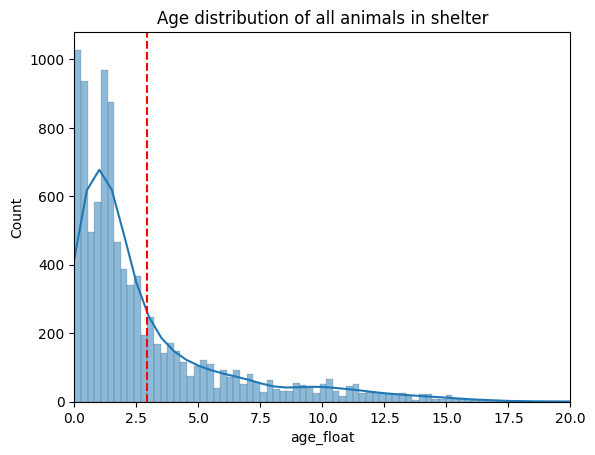

In [43]:
# age distribution in general
sns.histplot(data=df, x='age_float', kde=True)
plt.xlim(0,20)
plt.title('Age distribution of all animals in shelter')
plt.axvline(x=df.age_float.mean(), color='r', linestyle='--')

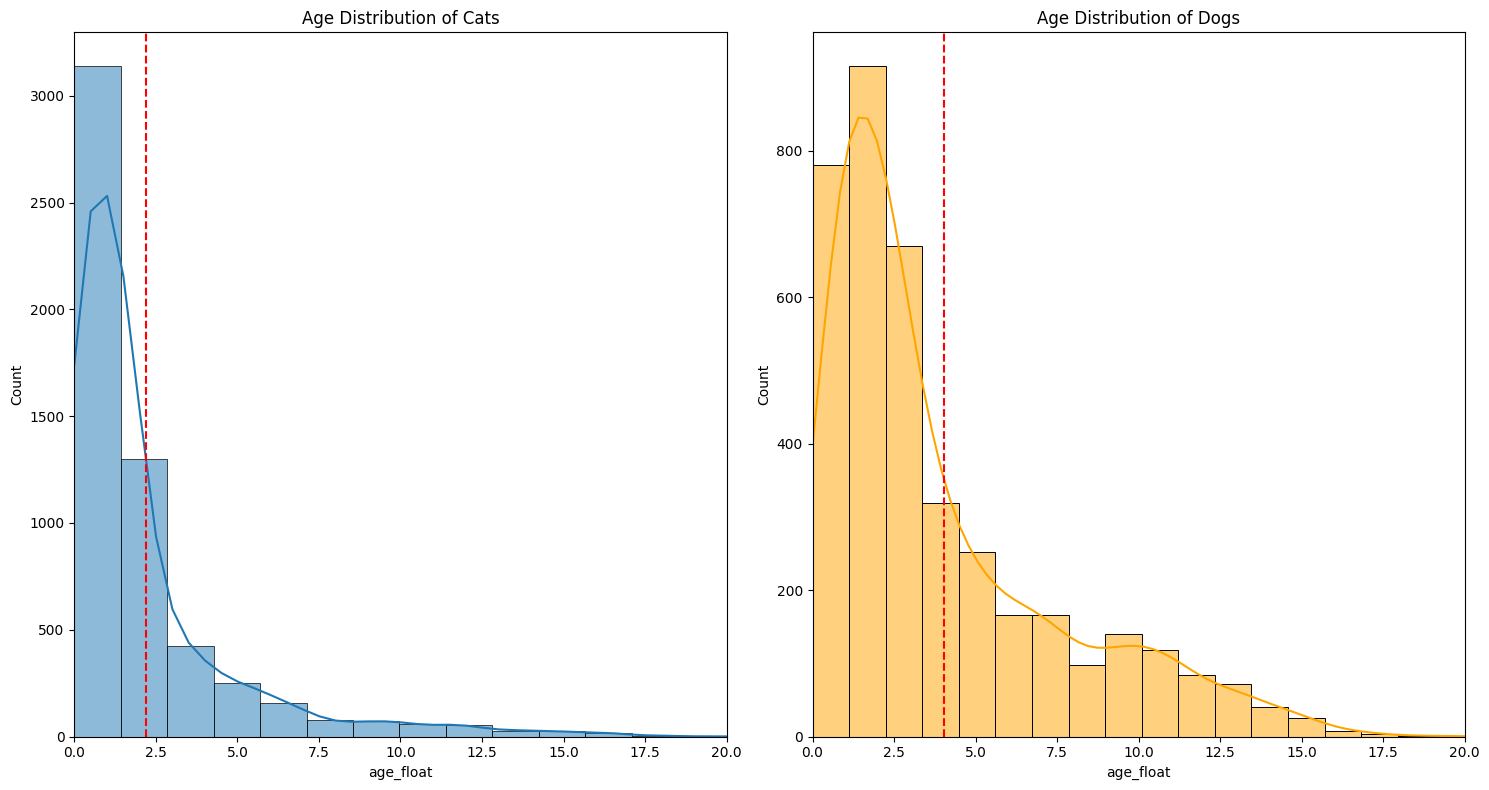

In [44]:
# age distribution

fig, ax = plt.subplots(1,2, figsize=(15,8))
sns.histplot(data=df[df.species=='Cat'], x='age_float', bins=70, kde=True, ax=ax[0])
ax[0].set_xlim(0,20)
ax[0].set_title('Age Distribution of Cats')
ax[0].axvline(x=df[df.species=='Cat'].age_float.mean(), color='r', linestyle='--')

sns.histplot(data=df[df.species=='Dog'], x='age_float', bins=50, kde=True, ax=ax[1], color='orange')
ax[1].set_xlim(0,20)
ax[1].set_title('Age Distribution of Dogs')
ax[1].axvline(x=df[df.species=='Dog'].age_float.mean(), color='r', linestyle='--')

plt.tight_layout()

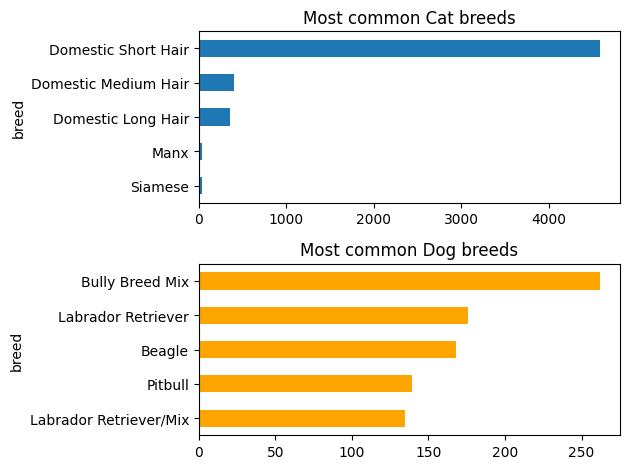

In [45]:
# top 5 breeds 

fig, ax = plt.subplots(2,1)
df[df.species=='Cat'].groupby(['breed'])['breed'].count().nlargest(5).sort_values(ascending=True).plot.barh(ax=ax[0])
ax[0].set_title('Most common Cat breeds')


df[df.species=='Dog'].groupby(['breed'])['breed'].count().nlargest(5).sort_values(ascending=True).plot.barh(ax=ax[1], color='orange')
ax[1].set_title('Most common Dog breeds')

plt.tight_layout()

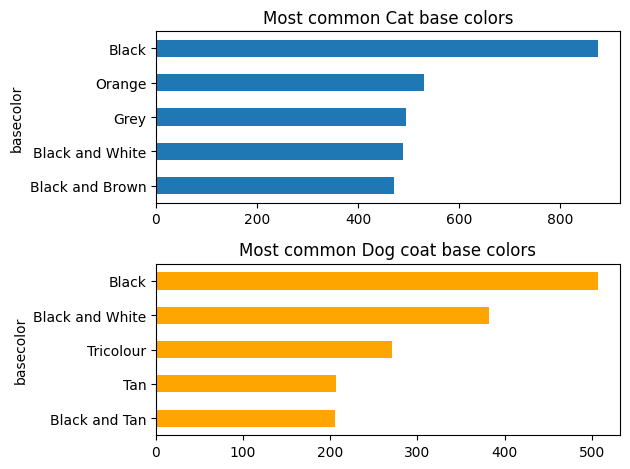

In [46]:
# top 5 colors 

fig, ax = plt.subplots(2,1)
df[df.species=='Cat'].groupby(['basecolor'])['basecolor'].count().nlargest(5).sort_values(ascending=True).plot.barh(ax=ax[0])
ax[0].set_title('Most common Cat base colors')


df[df.species=='Dog'].groupby(['basecolor'])['basecolor'].count().nlargest(5).sort_values(ascending=True).plot.barh(ax=ax[1], color='orange')
ax[1].set_title('Most common Dog coat base colors')

plt.tight_layout()

In [47]:
df.columns

Index(['id', 'intakedate', 'intakereason', 'istransfer', 'name', 'breed',
       'basecolor', 'species', 'sex', 'movementdate', 'movementtype',
       'istrial', 'returndate', 'returnedreason', 'deceaseddate',
       'deceasedreason', 'diedoffshelter', 'puttosleep', 'isdoa', 'age_float',
       'is_chipped'],
      dtype='object')

In [48]:
df.movementtype.value_counts()

Adoption            5399
Foster              2410
Reclaimed           1372
Transfer             305
Stolen                 6
Released To Wild       4
Escaped                2
Name: movementtype, dtype: int64

In [49]:
other_movement = ['Transfer', 'Stolen', 'Released To Wild', 'Escaped']
df.movementtype.replace(other_movement, 'other', inplace=True)

df.movementtype.value_counts()

Adoption     5399
Foster       2410
Reclaimed    1372
other         317
Name: movementtype, dtype: int64

Does having a microchip increase the chances of a pet being reclaimed?
<br>
Any important features of getting adopted? Fostered?

Text(0.5, 1.0, 'Movement type by species')

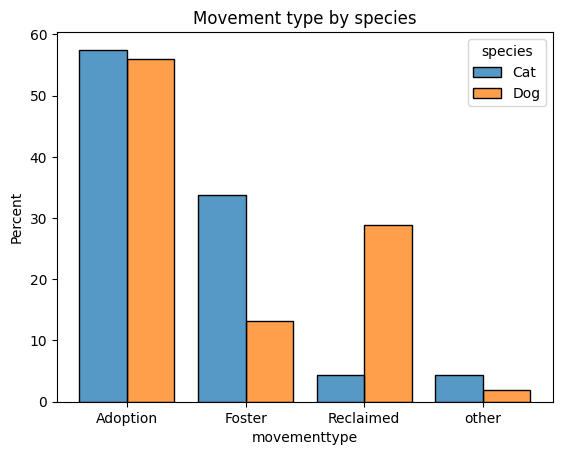

In [50]:
# countplot with percentage
sns.histplot(data=df, x='movementtype', hue='species', stat='percent', common_norm=False, multiple='dodge', shrink=0.8)
plt.title('Movement type by species')

Text(0.5, 1.0, 'Movement type of microchipped vs non-chipped animals')

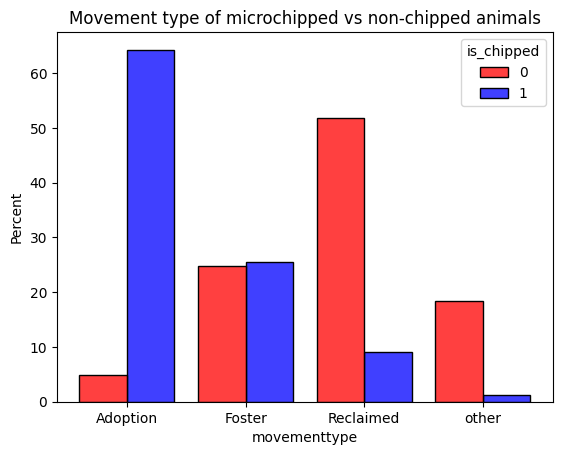

In [51]:
# countplot with percentage
sns.histplot(data=df, x='movementtype', hue='is_chipped', stat='percent', common_norm=False, multiple='dodge', shrink=0.8, palette=['red', 'blue'])
plt.title('Movement type of microchipped vs non-chipped animals')

In [52]:
df.returnedreason.value_counts()

Stray                                8855
Incompatible with owner lifestyle     308
Moving                                 50
Biting                                 33
Incompatible with other pets           32
Unsuitable Accommodation               30
Return Adopt - Behavior                26
Allergies                              21
Landlord issues                        20
Return adopt - lifestyle issue         19
Unable to Afford                       17
Return Adopt - Other                   14
Rabies Monitoring                      12
Owner requested Euthanasia             11
Sick/Injured                           10
Police Assist                           8
Abandoned                               6
Owner Deceased                          6
Behavioral Issues                       5
Transfer from Other Shelter             5
DOA                                     4
Marriage/Relationship split             4
Abuse/ neglect                          1
Return Adopt - Animal Health      

In [53]:
# like intakereason, there are too many values
rincompatability = ['Incompatible with owner lifestyle', 'Unsuitable Accommodation', 'Moving', 'Landlord issues', \
                  'Incompatible with other pets', 'Biting', 'Behavioral Issues', 'Return adopt - lifestyle issue', \
                   'Return Adopt - Behavior']

rstray = ['Stray', 'Abandoned', 'TNR - Trap/Neuter/Release', 'Owner Died', 'Owner Deceased']

rhealth = ['Allergies', 'Sick/Injured', 'Rabies Monitoring', 'Owner requested Euthanasia', 'DOA', \
           'Return Adopt - Animal Health']

return_etc = list(set(df.returnedreason.unique()).difference(set(rincompatability) | set(rstray) | set(rhealth)))

df.returnedreason.replace(rincompatability, 'Incompatability', inplace=True)
df.returnedreason.replace(rstray, 'Stray', inplace=True)
df.returnedreason.replace(rhealth, 'Health', inplace=True)
df.returnedreason.replace(return_etc, 'other', inplace=True)

df.returnedreason.value_counts()

Stray              8867
Incompatability     523
Health               59
other                49
Name: returnedreason, dtype: int64

In [54]:
df.head()

,id,intakedate,intakereason,istransfer,name,breed,basecolor,species,sex,movementdate,...,istrial,returndate,returnedreason,deceaseddate,deceasedreason,diedoffshelter,puttosleep,isdoa,age_float,is_chipped
0,15801,2009-11-28,Incompatability,0,Jadzia,Domestic Short Hair,Tortie,Cat,Female,2017-05-13,...,0.0,NaT,Stray,NaT,Died in care,0,0,0,9.17,1
1,15932,2009-12-08,Incompatability,0,Gonzo,German Shepherd Dog/Mix,Tan,Dog,Male,2017-04-24,...,0.0,NaT,Stray,NaT,Died in care,0,0,0,9.08,1
2,28859,2012-08-10,Stray,0,Maggie,Shep Mix/Siberian Husky,Various,Dog,Female,2017-04-15,...,0.0,NaT,Stray,NaT,Died in care,0,0,0,6.67,1
3,30812,2013-01-11,Stray,0,Pretty Girl,Domestic Short Hair,Dilute tortoiseshell,Cat,Female,2017-04-18,...,0.0,2018-05-29,Stray,NaT,Died in care,0,0,0,8.92,1
4,30812,2013-01-11,Stray,0,Pretty Girl,Domestic Short Hair,Dilute tortoiseshell,Cat,Female,2018-05-29,...,0.0,NaT,Stray,NaT,Died in care,0,0,0,8.92,1


In [55]:
df.intakedate.dtype

dtype('<M8[ns]')

In [56]:
df.sort_values('intakedate')

,id,intakedate,intakereason,istransfer,name,breed,basecolor,species,sex,movementdate,...,istrial,returndate,returnedreason,deceaseddate,deceasedreason,diedoffshelter,puttosleep,isdoa,age_float,is_chipped
0,15801,2009-11-28 00:00:00,Incompatability,0,Jadzia,Domestic Short Hair,Tortie,Cat,Female,2017-05-13,...,0.0,NaT,Stray,NaT,Died in care,0,0,0,9.17,1
1,15932,2009-12-08 00:00:00,Incompatability,0,Gonzo,German Shepherd Dog/Mix,Tan,Dog,Male,2017-04-24,...,0.0,NaT,Stray,NaT,Died in care,0,0,0,9.08,1
2,28859,2012-08-10 00:00:00,Stray,0,Maggie,Shep Mix/Siberian Husky,Various,Dog,Female,2017-04-15,...,0.0,NaT,Stray,NaT,Died in care,0,0,0,6.67,1
3,30812,2013-01-11 00:00:00,Stray,0,Pretty Girl,Domestic Short Hair,Dilute tortoiseshell,Cat,Female,2017-04-18,...,0.0,2018-05-29,Stray,NaT,Died in care,0,0,0,8.92,1
4,30812,2013-01-11 00:00:00,Stray,0,Pretty Girl,Domestic Short Hair,Dilute tortoiseshell,Cat,Female,2018-05-29,...,0.0,NaT,Stray,NaT,Died in care,0,0,0,8.92,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10285,64584,2019-08-27 16:52:09,Incompatability,0,Max,Domestic Medium Hair,Orange and White,Cat,Male,2019-08-29,...,0.0,NaT,Stray,NaT,Court Order/ Legal,0,0,0,0.40,1
10286,64588,2019-08-27 18:14:11,Stray,0,Punkin,Domestic Short Hair,Calico,Cat,Female,2019-08-28,...,0.0,NaT,Stray,NaT,Court Order/ Legal,0,0,0,0.12,1
10287,64606,2019-08-29 12:10:21,Stray,0,Dozer,Coonhound,Red,Dog,Male,2019-08-29,...,0.0,NaT,Stray,NaT,Court Order/ Legal,0,0,0,6.67,1
10288,64608,2019-08-29 18:58:06,Stray,0,Lucy Farmer,Beagle,Tricolour,Dog,Female,2019-08-30,...,0.0,NaT,Stray,NaT,Court Order/ Legal,0,0,0,7.42,1


In [57]:
df.columns

Index(['id', 'intakedate', 'intakereason', 'istransfer', 'name', 'breed',
       'basecolor', 'species', 'sex', 'movementdate', 'movementtype',
       'istrial', 'returndate', 'returnedreason', 'deceaseddate',
       'deceasedreason', 'diedoffshelter', 'puttosleep', 'isdoa', 'age_float',
       'is_chipped'],
      dtype='object')

Text(0.5, 1.0, 'Intake reason by species')

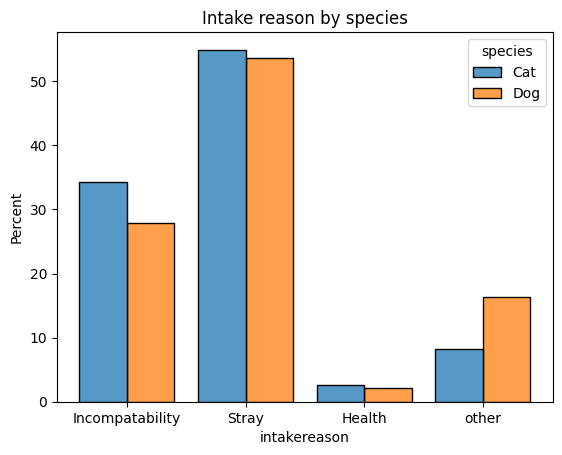

In [58]:
# countplot with percentage
sns.histplot(data=df, x='intakereason', hue='species', stat='percent', common_norm=False, multiple='dodge', shrink=0.8)
plt.title('Intake reason by species')

Text(0.5, 1.0, 'Return reason by species')

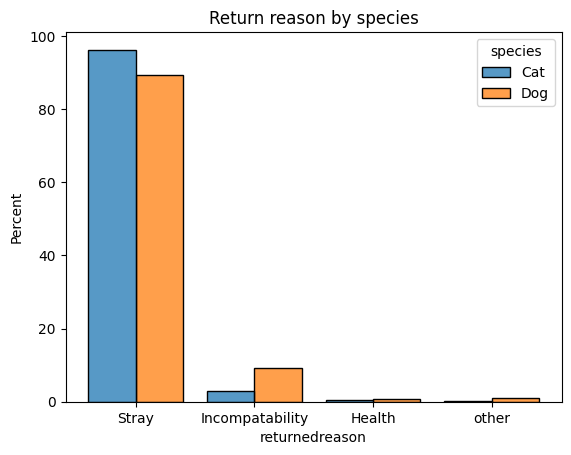

In [59]:
# countplot with percentage
sns.histplot(data=df, x='returnedreason', hue='species', stat='percent', common_norm=False, multiple='dodge', shrink=0.8)
plt.title('Return reason by species')

C:\Users\KNguyen\AppData\Local\Temp\ipykernel_11764\2881091886.py:8: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  plt.axvline(pd.datetime(2017,7,15), color='y')
C:\Users\KNguyen\AppData\Local\Temp\ipykernel_11764\2881091886.py:9: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  plt.axvline(pd.datetime(2018,7,1), color='y')
C:\Users\KNguyen\AppData\Local\Temp\ipykernel_11764\2881091886.py:10: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  plt.axvline(pd.datetime(2019,6,1), color='y')


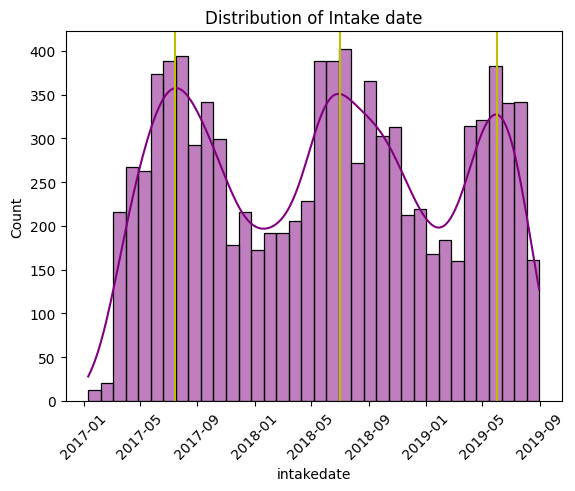

In [60]:
df_subset = df[(df["intakedate"] < '2022-01-01') & (df["intakedate"] > '2017-01-01')]

sns.histplot(data=df_subset, x='intakedate', stat='count', kde=True, color='purple', bins=36)
plt.xticks(rotation = 45)
plt.title('Distribution of Intake date')

# july 2017, 2018 & june 2019
plt.axvline(pd.datetime(2017,7,15), color='y')
plt.axvline(pd.datetime(2018,7,1), color='y')
plt.axvline(pd.datetime(2019,6,1), color='y')

C:\Users\KNguyen\AppData\Local\Temp\ipykernel_11764\1966995078.py:8: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  plt.axvline(pd.datetime(2017,8,1), color='y')
C:\Users\KNguyen\AppData\Local\Temp\ipykernel_11764\1966995078.py:9: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  plt.axvline(pd.datetime(2018,8,1), color='y')
C:\Users\KNguyen\AppData\Local\Temp\ipykernel_11764\1966995078.py:10: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  plt.axvline(pd.datetime(2019,7,1), color='y')


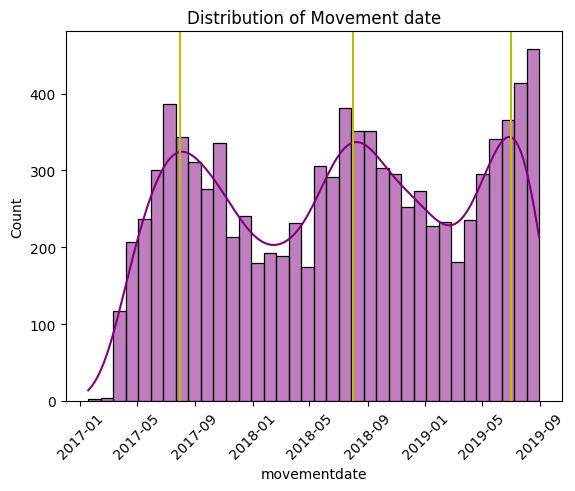

In [61]:
df_subset = df[(df["movementdate"] < '2022-01-01') & (df["movementdate"] > '2017-01-01')]

sns.histplot(data=df_subset, x='movementdate', stat='count', kde=True, color='purple', bins=36)
plt.xticks(rotation = 45)
plt.title('Distribution of Movement date')

# august 2017, 2018 & june 2019
plt.axvline(pd.datetime(2017,8,1), color='y')
plt.axvline(pd.datetime(2018,8,1), color='y')
plt.axvline(pd.datetime(2019,7,1), color='y')

C:\Users\KNguyen\AppData\Local\Temp\ipykernel_11764\1262709539.py:8: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  plt.axvline(pd.datetime(2017,9,1), color='y')
C:\Users\KNguyen\AppData\Local\Temp\ipykernel_11764\1262709539.py:9: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  plt.axvline(pd.datetime(2018,8,1), color='y')
C:\Users\KNguyen\AppData\Local\Temp\ipykernel_11764\1262709539.py:10: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  plt.axvline(pd.datetime(2019,7,1), color='y')


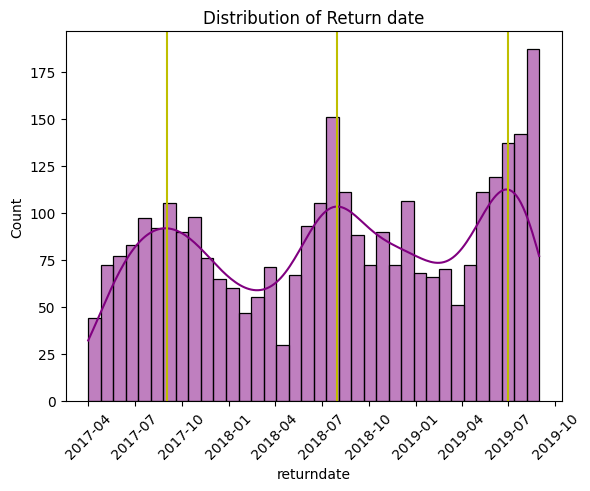

In [62]:
df_subset = df[(df["returndate"] < '2022-01-01') & (df["returndate"] > '2017-01-01')]

sns.histplot(data=df_subset, x='returndate', stat='count', kde=True, color='purple', bins=36)
plt.xticks(rotation = 45)
plt.title('Distribution of Return date')

# sep 2017, aug 2018 & june 2019
plt.axvline(pd.datetime(2017,9,1), color='y')
plt.axvline(pd.datetime(2018,8,1), color='y')
plt.axvline(pd.datetime(2019,7,1), color='y')

In [64]:
# save df for future use
df.to_csv(r'C:\Users\KNguyen\Desktop\springboard\adopted_animals\cat-dog-data.csv')